# 1 - One-photon SE near perfectly conducting plates

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 16})

In [4]:
def Gamma1_perp(x):   
    return 3*(1/3 - np.cos(2*x)/(2*x)**2 + np.sin(2*x)/(2*x)**3)

def Gamma1_par(x):    
    return (3/2)*(2/3 - np.sin(2*x)/(2*x) - np.cos(2*x)/(2*x)**2 + np.sin(2*x)/(2*x)**3)

def Gamma2_perp(x):    
    n = np.arange(1,x)
    an = (3/x)*(1 - (n/x)**2)*(np.cos(n*np.pi/2)**2)
        
    return np.sum(an) + 3/(2*x)


def Gamma2_par(x):    
    n = np.arange(1,x)
    an = (3/(2*x))*(1 + (n/x)**2)*(np.sin(n*np.pi/2)**2)
        
    return np.sum(an)

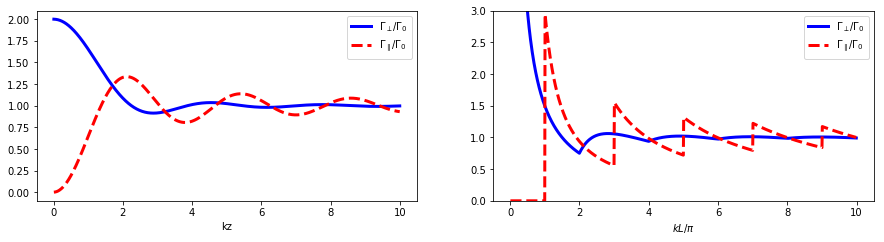

In [5]:
kz = np.arange(0.01,10,0.01)
plt.figure(figsize=(15,3.5))

plt.subplot(121)
plt.plot(kz,Gamma1_perp(kz),color='blue',linewidth=3,label='$\Gamma_\perp/\Gamma_0$')
plt.plot(kz,Gamma1_par(kz),color='red', linestyle='dashed',linewidth=3,label='$\Gamma_\parallel/\Gamma_0$')
plt.xlabel('kz')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(kz,np.vectorize(Gamma2_perp)(kz),color='blue',linewidth=3,label='$\Gamma_\perp/\Gamma_0$')
plt.plot(kz,np.vectorize(Gamma2_par)(kz),color='red', linestyle='dashed',linewidth=3,label='$\Gamma_\parallel/\Gamma_0$')
plt.ylim((0, 3))
plt.xlabel('$kL/\pi$')
plt.legend(loc="upper right")

plt.show()

# 2 - Two-photon SE near perfectly conducting plates

In [9]:
def gamma1(k_norm,k0z):
    g_perp = Gamma1_perp(k_norm*k0z)*Gamma1_perp((1 - k_norm)*k0z)
    g_par = Gamma1_par(k_norm*k0z)*Gamma1_par((1 - k_norm)*k0z)
    return (2*g_par + g_perp)/3

def gamma2(k_norm,k0z):
    g_perp = Gamma2_perp(k_norm*k0z)*Gamma2_perp((1 - k_norm)*k0z)
    g_par = Gamma2_par(k_norm*k0z)*Gamma2_par((1 - k_norm)*k0z)
    return (2*g_par + g_perp)/3

gamma1_vec = np.vectorize(gamma1)
gamma2_vec = np.vectorize(gamma2)

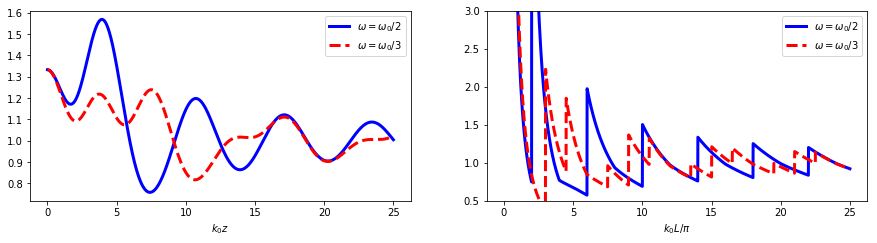

In [18]:
k0z = np.arange(0.01,25,0.01)
plt.figure(figsize=(15,3.5))

plt.subplot(121)
plt.plot(k0z,gamma1_vec(1/2,k0z),color='blue',linewidth=3,label='$\omega = \omega_0/2$')
plt.plot(k0z,gamma1_vec(1/3,k0z),color='red', linestyle='dashed',linewidth=3,label='$\omega = \omega_0/3$')
plt.xlabel('$k_0z$')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(k0z,gamma2_vec(1/2,k0z),color='blue',linewidth=3,label='$\omega = \omega_0/2$')
plt.plot(k0z,gamma2_vec(1/3,k0z),color='red', linestyle='dashed',linewidth=3,label='$\omega = \omega_0/3$')
plt.xlabel('$k_0L/\pi$')
plt.ylim((0.5, 3))
plt.legend(loc="upper right")
plt.show()

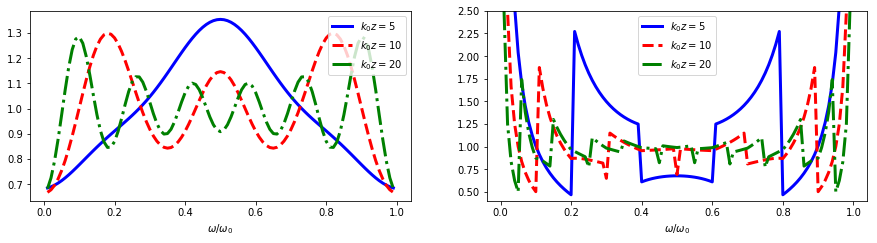

In [23]:
k_norm = np.arange(0.01,0.999,0.01)
plt.figure(figsize=(15,3.5))

plt.subplot(121)
plt.plot(k_norm,gamma1_vec(k_norm,5),color='blue',linewidth=3,label='$k_0z = 5$')
plt.plot(k_norm,gamma1_vec(k_norm,10),color='red', linestyle='dashed',linewidth=3,label='$k_0z = 10$')
plt.plot(k_norm,gamma1_vec(k_norm,20),color='green', linestyle='dashdot',linewidth=3,label='$k_0z = 20$')
plt.xlabel('$\omega/\omega_0$')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(k_norm,gamma2_vec(k_norm,5),color='blue',linewidth=3,label='$k_0z = 5$')
plt.plot(k_norm,gamma2_vec(k_norm,10),color='red', linestyle='dashed',linewidth=3,label='$k_0z = 10$')
plt.plot(k_norm,gamma2_vec(k_norm,20),color='green', linestyle='dashdot',linewidth=3,label='$k_0z = 20$')
plt.xlabel('$\omega/\omega_0$')
plt.ylim((0.4, 2.5))
plt.legend(loc="upper center")
plt.show()